In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.core.pylabtools import figsize
# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# use seaborn plotting defaults
import seaborn as sns; sns.set()


In [2]:
import os
directory = "/Users/amad/Desktop/data/IMU"

for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(os.path.join(root, subdirectory))
    for file in files:
        print(os.path.join(root, file))

/Users/amad/Desktop/data/IMU/Wyatt Hackley - Wyatt_Hackley
/Users/amad/Desktop/data/IMU/atreya - 2022-03-07 09.38.52 - atreya_avadhanula
/Users/amad/Desktop/data/IMU/Tom Truong - Thomas_Truong_IMU
/Users/amad/Desktop/data/IMU/Michael Mungaray - Michael_Mungaray
/Users/amad/Desktop/data/IMU/Syed Amad H Shah - Syed_Shah
/Users/amad/Desktop/data/IMU/Tom Truong - Tom_Truong_Fixed_IMU
/Users/amad/Desktop/data/IMU/Nathan Tolodziecki - 2022-02-24 21.29.22 - Nathan_Tolodziecki
/Users/amad/Desktop/data/IMU/Eric Yan - 2022-03-08 17.16.40 - Eric_Yan
/Users/amad/Desktop/data/IMU/Teegan Krieger - 2022-02-24 21.37.48 - Teegan_Krieger
/Users/amad/Desktop/data/IMU/Praneeth Aluru - 2022-03-01 20.26.24 - Praneeth_Aluru_Task_1
/Users/amad/Desktop/data/IMU/Jake Keels - 2022-03-01 19.32.11 - Jake_Keels
/Users/amad/Desktop/data/IMU/Steven Tagner - 2022-02-24 21.16.09 - steven_tagner
/Users/amad/Desktop/data/IMU/McKenzie Staton - McKenzie_Staton
/Users/amad/Desktop/data/IMU/Carlos Ruiz - Carlos Ruiz - Carlos

In [3]:
import os
from glob import glob
PATH = "/Users/amad/Desktop/data/IMU"
EXT = "*wave_data.csv"
wave = [file for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]



In [4]:
 import os
from glob import glob
PATH = "/Users/amad/Desktop/data/IMU"
EXT = "*fistbump_data.csv"
fistbump = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]


In [5]:
wave

['/Users/amad/Desktop/data/IMU/Wyatt Hackley - Wyatt_Hackley/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/atreya - 2022-03-07 09.38.52 - atreya_avadhanula/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Tom Truong - Thomas_Truong_IMU/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Michael Mungaray - Michael_Mungaray/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Syed Amad H Shah - Syed_Shah/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Nathan Tolodziecki - 2022-02-24 21.29.22 - Nathan_Tolodziecki/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Eric Yan - 2022-03-08 17.16.40 - Eric_Yan/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Teegan Krieger - 2022-02-24 21.37.48 - Teegan_Krieger/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Praneeth Aluru - 2022-03-01 20.26.24 - Praneeth_Aluru_Task_1/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Jake Keels - 2022-03-01 19.32.11 - Jake_Keels/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Steven Tagner - 2022-02-24 21.16.09 - steven_tagner/wave_da

In [6]:
wave_files = ['/Users/amad/Desktop/data/IMU/Wyatt Hackley - Wyatt_Hackley/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/atreya - 2022-03-07 09.38.52 - atreya_avadhanula/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Tom Truong - Thomas_Truong_IMU/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Michael Mungaray - Michael_Mungaray/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Syed Amad H Shah - Syed_Shah/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Nathan Tolodziecki - 2022-02-24 21.29.22 - Nathan_Tolodziecki/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Eric Yan - 2022-03-08 17.16.40 - Eric_Yan/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Teegan Krieger - 2022-02-24 21.37.48 - Teegan_Krieger/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Praneeth Aluru - 2022-03-01 20.26.24 - Praneeth_Aluru_Task_1/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Jake Keels - 2022-03-01 19.32.11 - Jake_Keels/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Steven Tagner - 2022-02-24 21.16.09 - steven_tagner/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/McKenzie Staton - McKenzie_Staton/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Anvesh - Anvesh_Avirneni New/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Karan - karansingh_sardar_corrected_data/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Pratik Devkota - Pratik_Devkota/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Zoie Harris - 2022-03-02 02.15.23 - Zoie_Harris/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Connor Contursi - 2022-02-24 21.02.57 - Connor_Contursi/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/TEJASAI_CHUNDRU - 2022-03-08 02.32.41 - TEJASAICHUNDRU3/wave_data.csv',
 '/Users/amad/Desktop/data/IMU/Thomas Knepshield - 2022-02-24 20.54.58 - Thomas_Knepshield/wave_data.csv']

In [7]:
fistbump

['/Users/amad/Desktop/data/IMU/atreya - 2022-03-07 09.38.52 - atreya_avadhanula/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Tom Truong - Thomas_Truong_IMU/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Michael Mungaray - Michael_Mungaray/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Syed Amad H Shah - Syed_Shah/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Nathan Tolodziecki - 2022-02-24 21.29.22 - Nathan_Tolodziecki/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Eric Yan - 2022-03-08 17.16.40 - Eric_Yan/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Teegan Krieger - 2022-02-24 21.37.48 - Teegan_Krieger/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Praneeth Aluru - 2022-03-01 20.26.24 - Praneeth_Aluru_Task_1/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Jake Keels - 2022-03-01 19.32.11 - Jake_Keels/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Steven Tagner - 2022-02-24 21.16.09 - steven_tagner/fistbump_data.csv',
 '/Users/amad/Desktop/data/I

In [8]:
fistbump_files = ['/Users/amad/Desktop/data/IMU/atreya - 2022-03-07 09.38.52 - atreya_avadhanula/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Tom Truong - Thomas_Truong_IMU/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Michael Mungaray - Michael_Mungaray/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Syed Amad H Shah - Syed_Shah/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Nathan Tolodziecki - 2022-02-24 21.29.22 - Nathan_Tolodziecki/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Eric Yan - 2022-03-08 17.16.40 - Eric_Yan/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Teegan Krieger - 2022-02-24 21.37.48 - Teegan_Krieger/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Praneeth Aluru - 2022-03-01 20.26.24 - Praneeth_Aluru_Task_1/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Jake Keels - 2022-03-01 19.32.11 - Jake_Keels/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Steven Tagner - 2022-02-24 21.16.09 - steven_tagner/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/McKenzie Staton - McKenzie_Staton/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Anvesh - Anvesh_Avirneni New/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Karan - karansingh_sardar_corrected_data/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Pratik Devkota - Pratik_Devkota/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Zoie Harris - 2022-03-02 02.15.23 - Zoie_Harris/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Connor Contursi - 2022-02-24 21.02.57 - Connor_Contursi/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/TEJASAI_CHUNDRU - 2022-03-08 02.32.41 - TEJASAICHUNDRU3/fistbump_data.csv',
 '/Users/amad/Desktop/data/IMU/Thomas Knepshield - 2022-02-24 20.54.58 - Thomas_Knepshield/fistbump_data.csv']

In [9]:
waveData = pd.concat((pd.read_csv(i) for i in wave_files)) # Import
waveData.to_csv('/Users/amad/Desktop/wave_combined.csv', index = False)

In [10]:
fistbumpData = pd.concat((pd.read_csv(i) for i in fistbump_files))
fistbumpData.to_csv('/Users/amad/Desktop/fistbump_combined.csv', index= False)

In [11]:

df1 = pd.read_csv("/Users/amad/Desktop/Class IMU/wave_combined.csv")

df2 = pd.read_csv("/Users/amad/Desktop/Class IMU/fistbump_combined.csv")

In [12]:
df2

,aX,aY,aZ,gX,gY,gZ,sample
0,-0.369,-0.928,1.261,39.612,-99.060,-117.004,1.0
1,-0.349,-0.949,1.362,33.386,-91.125,-119.690,1.0
2,-0.306,-0.964,1.425,23.987,-82.214,-116.333,1.0
3,-0.260,-0.969,1.469,17.700,-70.557,-111.694,1.0
4,-0.190,-0.918,1.468,17.090,-54.077,-108.276,1.0
...,...,...,...,...,...,...,...
107095,0.341,-0.180,0.901,1.953,4.028,0.549,50.0
107096,0.339,-0.174,0.899,2.014,5.371,1.831,50.0
107097,0.327,-0.167,0.904,1.953,6.104,2.441,50.0
107098,0.312,-0.151,0.916,1.709,5.737,2.441,50.0


In [13]:
df1

,aX,aY,aZ,gX,gY,gZ,sample
0,0.812,-1.476,-0.307,28.809,-8.667,-63.782,1
1,0.831,-1.480,-0.277,13.855,-6.836,-56.641,1
2,0.806,-1.490,-0.307,1.526,-7.690,-49.927,1
3,0.825,-1.456,-0.273,-5.371,-7.568,-40.405,1
4,0.824,-1.452,-0.261,-7.690,-8.545,-28.809,1
...,...,...,...,...,...,...,...
107095,0.562,0.891,0.079,0.610,-7.324,3.906,50
107096,0.567,0.902,0.051,0.000,-4.639,-0.183,50
107097,0.572,0.877,0.026,2.380,-2.808,-5.310,50
107098,0.578,0.831,-0.004,6.775,-1.831,-8.972,50


In [14]:
df1["label"] = "0"
df1.to_csv("wave_data.csv", index = False)
df2["label"] = "1"
df2.to_csv("fistbump_data.csv", index = False)

In [15]:
df1 

,aX,aY,aZ,gX,gY,gZ,sample,label
0,0.812,-1.476,-0.307,28.809,-8.667,-63.782,1,0
1,0.831,-1.480,-0.277,13.855,-6.836,-56.641,1,0
2,0.806,-1.490,-0.307,1.526,-7.690,-49.927,1,0
3,0.825,-1.456,-0.273,-5.371,-7.568,-40.405,1,0
4,0.824,-1.452,-0.261,-7.690,-8.545,-28.809,1,0
...,...,...,...,...,...,...,...,...
107095,0.562,0.891,0.079,0.610,-7.324,3.906,50,0
107096,0.567,0.902,0.051,0.000,-4.639,-0.183,50,0
107097,0.572,0.877,0.026,2.380,-2.808,-5.310,50,0
107098,0.578,0.831,-0.004,6.775,-1.831,-8.972,50,0


In [16]:
df2 

,aX,aY,aZ,gX,gY,gZ,sample,label
0,-0.369,-0.928,1.261,39.612,-99.060,-117.004,1.0,1
1,-0.349,-0.949,1.362,33.386,-91.125,-119.690,1.0,1
2,-0.306,-0.964,1.425,23.987,-82.214,-116.333,1.0,1
3,-0.260,-0.969,1.469,17.700,-70.557,-111.694,1.0,1
4,-0.190,-0.918,1.468,17.090,-54.077,-108.276,1.0,1
...,...,...,...,...,...,...,...,...
107095,0.341,-0.180,0.901,1.953,4.028,0.549,50.0,1
107096,0.339,-0.174,0.899,2.014,5.371,1.831,50.0,1
107097,0.327,-0.167,0.904,1.953,6.104,2.441,50.0,1
107098,0.312,-0.151,0.916,1.709,5.737,2.441,50.0,1


In [17]:
df1

,aX,aY,aZ,gX,gY,gZ,sample,label
0,0.812,-1.476,-0.307,28.809,-8.667,-63.782,1,0
1,0.831,-1.480,-0.277,13.855,-6.836,-56.641,1,0
2,0.806,-1.490,-0.307,1.526,-7.690,-49.927,1,0
3,0.825,-1.456,-0.273,-5.371,-7.568,-40.405,1,0
4,0.824,-1.452,-0.261,-7.690,-8.545,-28.809,1,0
...,...,...,...,...,...,...,...,...
107095,0.562,0.891,0.079,0.610,-7.324,3.906,50,0
107096,0.567,0.902,0.051,0.000,-4.639,-0.183,50,0
107097,0.572,0.877,0.026,2.380,-2.808,-5.310,50,0
107098,0.578,0.831,-0.004,6.775,-1.831,-8.972,50,0


In [18]:
frames = [df1, df2]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv("/Users/amad/Desktop/combined_gesture.csv", index = False)

In [19]:
gesture = pd.read_csv("/Users/amad/Desktop/495/combined_gesture.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
gesture = gesture.apply(pd.to_numeric, errors='coerce')
gesture=gesture.fillna(0)

In [21]:
gesture

,aX,aY,aZ,gX,gY,gZ,sample,label
0,0.444,0.776,0.452,4.028,2.930,-0.854,13.0,1
1,0.896,-0.448,0.136,-1.770,1.282,-1.587,2.0,1
2,0.030,-0.173,1.002,-14.099,-1.099,-12.146,35.0,1
3,0.315,1.432,0.237,135.071,10.681,200.439,8.0,0
4,0.017,0.841,0.501,1.282,-1.831,-3.479,13.0,0
...,...,...,...,...,...,...,...,...
253833,-0.466,-0.304,0.589,205.322,-91.187,333.496,42.0,0
253834,0.956,0.677,0.089,44.922,7.568,14.343,41.0,0
253835,-0.277,0.291,0.860,8.179,26.062,65.674,4.0,1
253836,0.398,1.066,-0.043,4.028,13.855,-12.695,20.0,0


In [22]:
X=gesture.drop(columns=['sample', 'label'])

In [23]:
y=gesture[['label']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(203070, 6)
(203070, 1)
(50768, 6)
(50768, 1)


In [25]:
X_train

,aX,aY,aZ,gX,gY,gZ
44497,0.217,1.316,-0.215,66.223,-0.732,17.212
102979,0.772,-0.185,0.224,2.686,-71.228,42.664
122691,-0.038,0.873,-0.417,-17.090,2.991,-1.038
228366,0.124,1.593,-0.368,-157.837,-39.246,-177.368
197468,0.836,-0.267,1.255,-61.890,-126.038,-35.583
...,...,...,...,...,...,...
232422,0.977,-0.151,0.013,-32.776,-3.906,12.451
124605,-0.666,1.502,-0.733,-112.122,239.258,233.093
20463,0.981,0.979,-0.211,32.104,1.831,0.916
18638,0.972,-0.198,-0.007,5.005,5.615,-0.122


In [26]:
y_train

,label
44497,0
102979,1
122691,1
228366,0
197468,1
...,...
232422,1
124605,0
20463,0
18638,1


In [27]:
# Fitting the model Random Forest
clf = RandomForestClassifier(n_estimators=100,max_depth = 2, random_state=50)
clf.fit(X_train, y_train)

<ipython-input-27-c8245b9b7894>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=50)

In [28]:
clf.predict_proba(X_test)
predicted = clf.predict(X_test)
clf.score(X_test, y_test)

0.7334935392373149

In [29]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.86      0.56      0.68     25481
           1       0.67      0.91      0.77     25287

    accuracy                           0.73     50768
   macro avg       0.77      0.73      0.73     50768
weighted avg       0.77      0.73      0.72     50768



In [30]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[14194 11287]
 [ 2243 23044]]


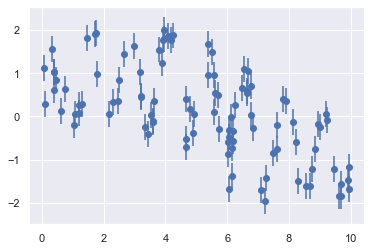

In [31]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


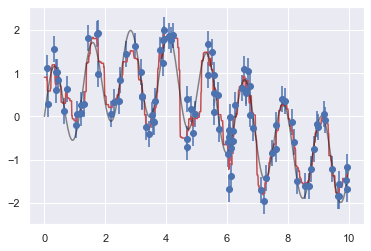

In [32]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [33]:
from micromlgen import port

with open("./models/Class_IMU_Classifier.h", "w") as file:
    file.write(port(clf, classname="Classifier"))

In [34]:
!cat ./models/Class_IMU_Classifier.h

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class Classifier {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[3] <= 10.406500339508057) {
                            if (x[5] <= -41.29049873352051) {
                                votes[0] += 1;
                            }

                            else {
                                votes[1] += 1;
                            }
                        }

                        else {
                            if (x[1] <= 0.882500022649765) {
                                votes[0] += 1;
                            }

                            else {
                                votes[0] += 1;
                           

In [35]:
!du -sh ./models/Class_IMU_Classifier.h


 68K	./models/Class_IMU_Classifier.h
